# Problem Statement:
Car Data- Here, we will apply k-means clustering for grouping the similar cars in one cluster

# Q1. Load the Cars Data and necesary modules file into Python DataFrame and view top 10 rows

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv('cars.csv')

data.head(10)


,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


# Q2.  Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis

In [79]:
print(data.shape)
print(data.dtypes)
print(data.info)
data.describe()

(398, 9)
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object
<bound method DataFrame.info of       mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0    18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1    15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2    18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3    16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4    17.0    8  302.0  140  3449  10.5  70       1                ford torino
..    ...  ...    ...  ...   ...   ...  ..     ...                        ...
393  27.0    4  140.0   86  2790  15.6  82       1            ford mustang gl
394  44.0    4   97.0   52  2130  24.6  82       2                  vw pickup
395  32.0    4  135.0   84  2295  11.6  82       1             

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Q3. Check for missing value check, incorrect data and perform imputation with mean, median and mode as necessary

In [80]:
print(data.isna().sum())
print(data.loc[32,:])
print(data[data['hp']=="?"])
data['hp'].replace("?",np.nan,inplace=True)
print(data.loc[32,:])

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64
mpg                 25
cyl                  4
disp                98
hp                   ?
wt                2046
acc                 19
yr                  71
origin               1
car_name    ford pinto
Name: 32, dtype: object
      mpg  cyl   disp hp    wt   acc  yr  origin              car_name
32   25.0    4   98.0  ?  2046  19.0  71       1            ford pinto
126  21.0    6  200.0  ?  2875  17.0  74       1         ford maverick
330  40.9    4   85.0  ?  1835  17.3  80       2  renault lecar deluxe
336  23.6    4  140.0  ?  2905  14.3  80       1    ford mustang cobra
354  34.5    4  100.0  ?  2320  15.8  81       2           renault 18i
374  23.0    4  151.0  ?  3035  20.5  82       1        amc concord dl
mpg                 25
cyl                  4
disp                98
hp                 NaN
wt                2046
acc               

392
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object


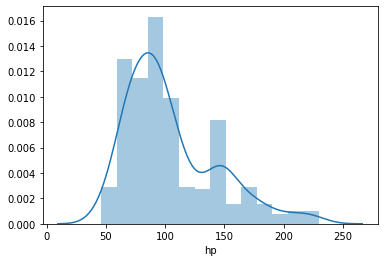

In [81]:
import seaborn as sns
hp = data['hp'].dropna()
print(hp.count())
sns.distplot(pd.to_numeric(hp))
data['hp'].fillna(hp.median(),inplace=True)
data['hp']= data['hp'].astype('float')
print(data.dtypes)

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [82]:
data['age']= 83- data['yr']
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,age
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,13
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,13
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,13
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,13
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,13


In [83]:
one_hot=pd.get_dummies(data['origin'])
one_hot=one_hot.add_prefix('Origin_')
data=data.join(one_hot)
data.head()




,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,age,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,13,1,0,0



# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [84]:
cars_new = data.drop(['yr','origin','car_name'], axis =1)


In [85]:
cars_new.head()

,mpg,cyl,disp,hp,wt,acc,age,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504,12.0,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,13,1,0,0


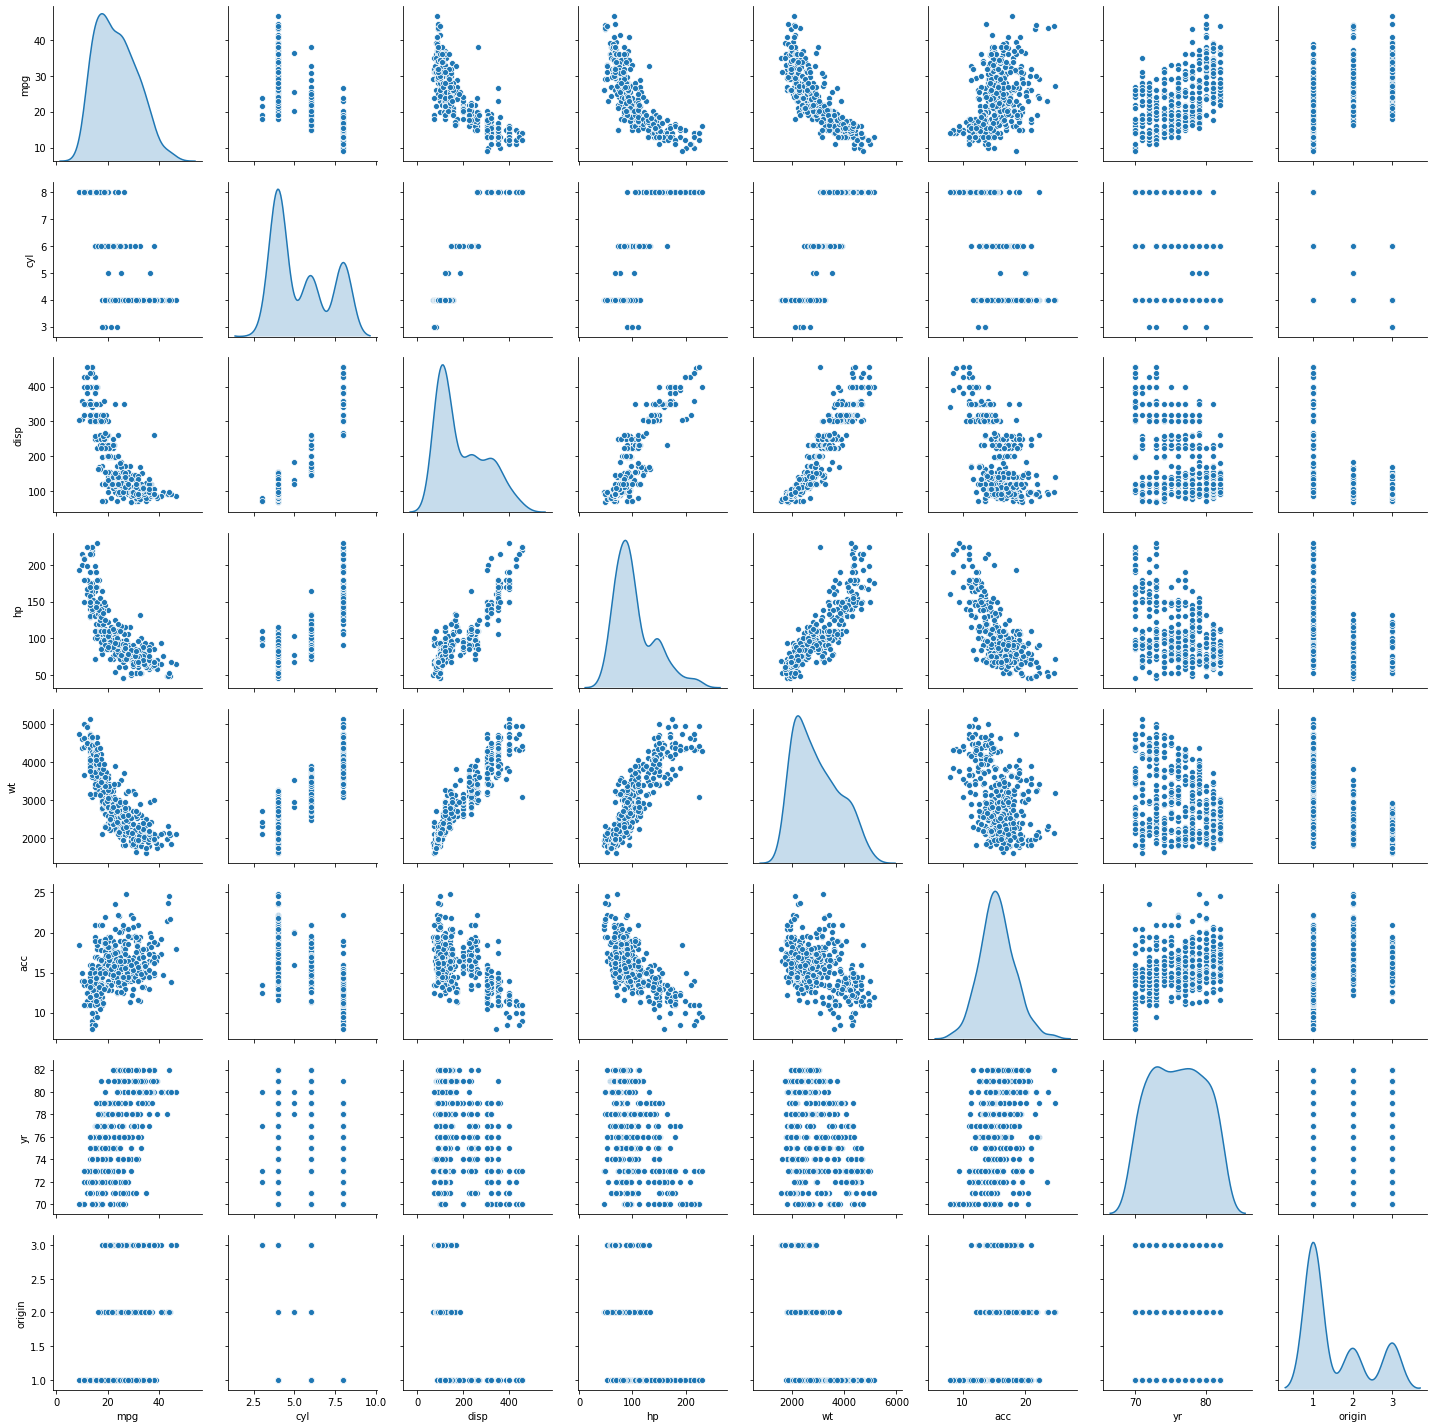

In [41]:
sns.pairplot(data,diag_kind='kde')

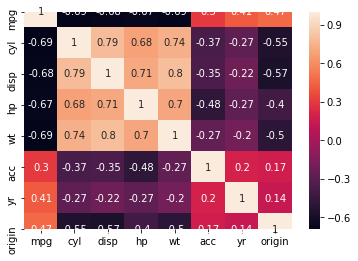

In [40]:
sns.heatmap(data.corr(method='kendall'),annot=True)

# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

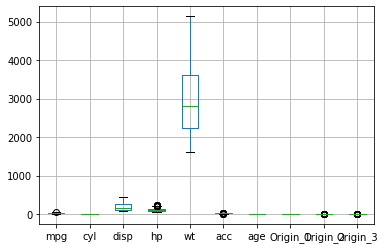

In [58]:
cars_new.boxplot()

# Q7. Create appropriate clusters with the new data set

{'whiskers': [<matplotlib.lines.Line2D at 0x2d552e7d9c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2d552e7db48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d552e7d188>],
 'medians': [<matplotlib.lines.Line2D at 0x2d552e81fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d552e81bc8>],
 'means': []}

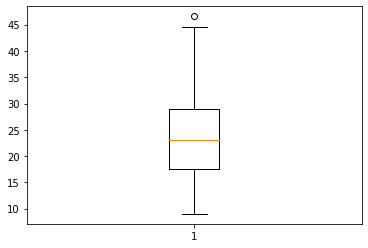

In [86]:
plt.boxplot(cars_new['mpg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2d551083e48>,
 'caps': [<matplotlib.lines.Line2D at 0x2d551083fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d551083608>],
 'medians': [<matplotlib.lines.Line2D at 0x2d551087fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d55108d9c8>],
 'means': []}

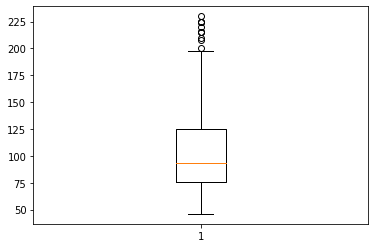

In [63]:
plt.boxplot(cars_new['hp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2d552ee3f48>,
 'caps': [<matplotlib.lines.Line2D at 0x2d552ee7a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d552ee3688>],
 'medians': [<matplotlib.lines.Line2D at 0x2d552ee7c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d552eedac8>],
 'means': []}

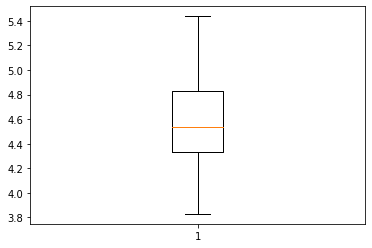

In [87]:
cars_new['hp'] = np.log(cars_new['hp'])
cars_new['acc'] = np.log(cars_new['acc'])
cars_new['mpg'] = np.log(cars_new['mpg'])

cars_new.head()
plt.boxplot(cars_new['hp'])

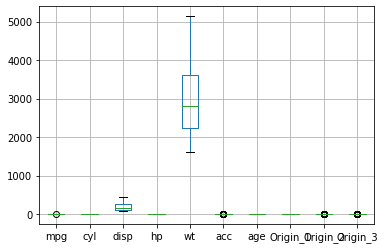

In [66]:
cars_new.boxplot()

In [88]:
from scipy.stats import zscore

cars_new.dtypes 
numeric_cols= cars_new.select_dtypes(np.int64,np.float64).columns
numeric_cols 
cars_new[numeric_cols]=cars_new[numeric_cols].apply(zscore)



In [92]:
cars_new.head()
cars_new.dtypes

mpg         float64
cyl         float64
disp        float64
hp          float64
wt          float64
acc         float64
age         float64
Origin_1      uint8
Origin_2      uint8
Origin_3      uint8
dtype: object

In [93]:

import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(cars_new)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]



C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


,num_clusters,cluster_errors
0,1,4.317776e+06
1,2,8.778590e+05
2,3,3.599319e+05
3,4,2.206189e+05
4,5,1.203258e+05
5,6,9.605880e+04
6,7,6.202153e+04
7,8,4.436066e+04
8,9,3.227421e+04
9,10,2.289503e+04


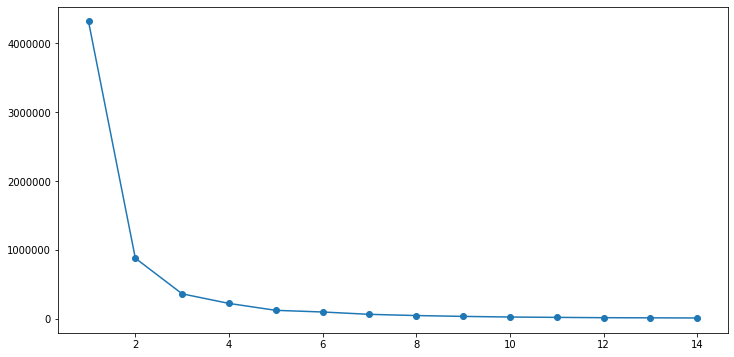

In [94]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Q8. Identify the appropriate clusters with result from above question

In [95]:
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(cars_new)

KMeans(n_clusters=4, n_init=5, random_state=12345)

# Q9. Check for no of values in each cluster and centers for each variables

In [99]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)


[ 73 221  79  25]


In [101]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(cars_new) )
centroid_df

,mpg,cyl,disp,hp,wt,acc,age,Origin_1,Origin_2,Origin_3
0,2.695084,1.498191,327.191781,5.009553,1.269336,2.583549,0.462684,1.000000,-1.942890e-16,0.000000
1,3.337819,-0.803051,111.649321,4.371395,-0.732614,2.790297,-0.292568,0.330317,3.122172e-01,0.357466
2,2.970461,0.387994,228.886076,4.595027,0.327681,2.801243,0.047281,0.987342,1.265823e-02,0.000000
3,2.611413,1.498191,413.680000,5.236560,1.734376,2.387675,1.085858,1.000000,-2.775558e-17,0.000000


# Q10. Assign the groups created above to data frame and study the characteristics for each group.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D5535A3908>,
      dtype=object)

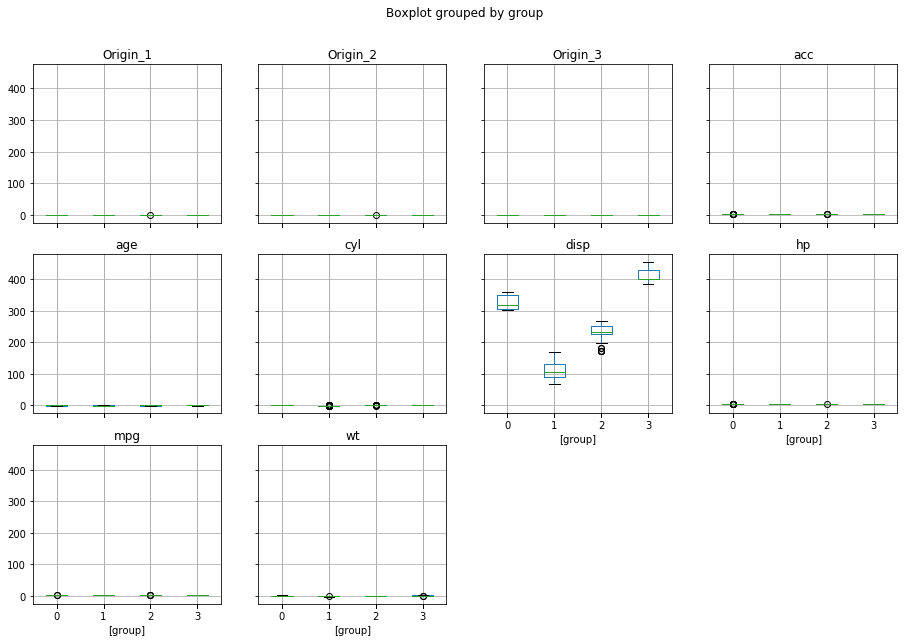

In [105]:
predictions = kmeans.predict(cars_new)
predictions
data["group"] = predictions
data['group'] = data['group'].astype('category')
data.head()


cars_new["group"] = predictions
cars_new.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))